In [58]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
import scripts.load_dataset as load_dataset
import scripts.map_and_average as mapper
import scripts.classification
import scripts.outliers as outliers

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
OUTPUT_FILES = load_dataset.OUTPUT_FILES
n_iters = 10
df = load_dataset.sample_dataset(csv_file=load_dataset.METADATA_FILE)

In [5]:
df.shape

(8396, 108)

In [48]:
import pandas as pd
import os
pb_df = pd.read_csv(os.path.join('/import/c4dm-04/mariap/FeatureCsvs/PB-melodia/', '49483_SampleAudio.csv'), header=None)
print pb_df.shape
pbihist = np.loadtxt(os.path.join('/import/c4dm-04/mariap/FeatureCsvs/PB-melodia/', '49483_SampleAudio.csv'), delimiter=',')
print pbihist.shape
pb_df.head()

(45, 3600)
(45, 3600)


0         1         2         3         4         5         6         7     \
0     0  0.713115  0.523960  0.704918  0.445776  0.286885  0.426230  0.142497   
1     0  1.000000  0.495213  0.228458  0.141961  0.210300  0.063387  0.059426   
2     0  1.000000  0.495213  0.228458  0.141961  0.210300  0.063387  0.059426   
3     0  1.000000  0.495213  0.228458  0.141961  0.210300  0.063387  0.059426   
4     0  1.000000  0.495213  0.228458  0.141961  0.210300  0.063387  0.059426   

       8         9     ...       3590      3591      3592      3593      3594  \
0  0.127995  0.301387  ...   0.157629  0.194199  0.227617  0.247793  0.297604   
1  0.138329  0.075272  ...   0.132717  0.142621  0.162430  0.195774  0.252228   
2  0.138329  0.075272  ...   0.132717  0.142621  0.162430  0.195774  0.252228   
3  0.138329  0.075272  ...   0.132717  0.142621  0.162430  0.195774  0.252228   
4  0.138329  0.075272  ...   0.131066  0.139320  0.157478  0.192473  0.245626   

       3595      3596      3597      3598  3599  
0  0.278058  0.366961  0.404792  0.508197     0  
1  0.237702  0.297128  0.428854  0.530208     0  
2  0.237702  0.297128  0.428854  0.530208     0  
3  0.237702  0.297128  0.428854  0.530208     0  
4  0.234401  0.288874  0.422252  0.515352     0  

[5 rows x 3600 columns]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
Name: 0, dtype: float64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
Name: 3599, dtype: float64
0     0.713115
1     1.000000
2     1.000000
3     1.000000
4     1.000000
5     0.725167
6     0.792076
7     0.849182
8     0.848190
9     0.849824
10    0.849824
11    0.860825
12    0.854481
13    0.864482
14    0.858819
15  

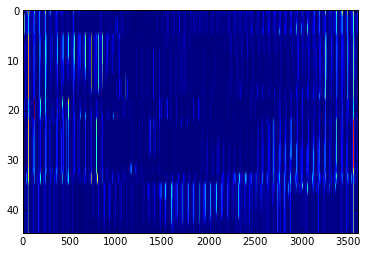

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(pb_df, aspect='auto')
print pb_df.iloc[:, 0]
print pb_df.iloc[:, -1]
print pb_df.iloc[:, 1]

In [56]:
np.argmax(pb_df.get_values(), axis=1)

array([ 59,   1,   1,   1,   1, 733, 733, 733, 733, 733, 733, 733, 733,
       733, 733,  60,  60,  60, 123, 123, 123, 182,  60,   1,   1,   1,
         1,   1,   1,   1,   1,   1,  60, 792, 792,  59,  59,  59,  59,
        59,  59,  59,  59,  59,  59])

In [8]:
df.head()

AlbumTitle  \
29182                               Music of Afghanistan   
29183                               Music of Afghanistan   
29184     Ustad Mohammad Omar: Virtuoso from Afghanistan   
29185  Music of Central Asia Vol. 3: Homayun Sakhi: T...   
29186                               Music of Afghanistan   

                                  Artist         Artist_Album  \
29182          Afghan National Orchestra      Various Artists   
29183                       Yaqub Kasimi      Various Artists   
29184  Ustad Mohammad Omar|Zakir Hussain  Ustad Mohammad Omar   
29185                      Homayun Sakhi        Homayun Sakhi   
29186                Rebab and Dhol Duet      Various Artists   

       BuyLinkTrackDownload CatalogNumber CatalogNumber_Album Collection  \
29182                 26138   FW04361_201             FW04361        NaN   
29183                 26142   FW04361_205             FW04361        NaN   
29184                 51931  SFW40439_102            SFW40439        NaN   
29185                 53229  SFW40522_101            SFW40522        NaN   
29186                 26140   FW04361_203             FW04361        NaN   

      ContentType ContentType_Album      Country  \
29182       Track             Album  Afghanistan   
29183       Track             Album  Afghanistan   
29184       Track             Album  Afghanistan   
29185       Track             Album  Afghanistan   
29186       Track             Album  Afghanistan   

                             ...                         Language_iso3  \
29182                        ...                                   NaN   
29183                        ...                                   NaN   
29184                        ...                                   pbt   
29185                        ...                                   NaN   
29186                        ...                                   NaN   

       Language_iso1      Region  Latitude  Longitude  \
29182            NaN  South Asia  33.93911  67.709953   
29183            NaN  South Asia  33.93911  67.709953   
29184  Indo-European  South Asia  33.93911  67.709953   
29185            NaN  South Asia  33.93911  67.709953   
29186            NaN  South Asia  33.93911  67.709953   

                                                   Audio  \
29182  /import/c4dm-scratch/matthiasm/data/smithsonia...   
29183  /import/c4dm-scratch/matthiasm/data/smithsonia...   
29184  /import/c4dm-scratch/matthiasm/data/smithsonia...   
29185  /import/c4dm-scratch/matthiasm/data/smithsonia...   
29186  /import/c4dm-scratch/matthiasm/data/smithsonia...   

                                                  Speech  \
29182  /import/c4dm-02/people/mariap/SpeechMusic/2613...   
29183  /import/c4dm-02/people/mariap/SpeechMusic/2614...   
29184  /import/c4dm-02/people/mariap/SpeechMusic/5193...   
29185  /import/c4dm-02/people/mariap/SpeechMusic/5322...   
29186  /import/c4dm-02/people/mariap/SpeechMusic/2614...   

                                                 Melspec  \
29182  /import/c4dm-02/people/mariap/MelSpec/26138_Sa...   
29183  /import/c4dm-02/people/mariap/MelSpec/26142_Sa...   
29184  /import/c4dm-02/people/mariap/MelSpec/51931_Sa...   
29185  /import/c4dm-02/people/mariap/MelSpec/53229_Sa...   
29186  /import/c4dm-02/people/mariap/MelSpec/26140_Sa...   

                                                  Chroma  \
29182  /import/c4dm-04/mariap/FeatureCsvs/Smoothie-py...   
29183  /import/c4dm-04/mariap/FeatureCsvs/Smoothie-py...   
29184  /import/c4dm-04/mariap/FeatureCsvs/Smoothie-py...   
29185  /import/c4dm-04/mariap/FeatureCsvs/Smoothie-py...   
29186  /import/c4dm-04/mariap/FeatureCsvs/Smoothie-py...   

                                                 Melodia  
29182  /import/c4dm-02/people/mariap/Melodia/26138_Sa...  
29183  /import/c4dm-02/people/mariap/Melodia/26142_Sa...  
29184  /import/c4dm-02/people/mariap/Melodia/51931_Sa...  
29185  /import/c4dm-02/people/mariap/Melodia/53229_Sa...

## test on a few samples

In [47]:
train, val, test = load_dataset.features_for_train_test_sets(df.iloc[:10, :], write_output=False)

file 0 of 6
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 1 of 6
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 2 of 6
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 3 of 6
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 4 of 6
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB

## now run for the whole dataset

In [59]:
for n in range(n_iters):
    print "iteration %d" % n
    load_dataset.OUTPUT_FILES = [output_file.split('.pickle')[0]+'_'+str(n)+'.pickle' for 
                                 output_file in OUTPUT_FILES]
    load_dataset.features_for_train_test_sets(df, write_output=True)

iteration 0
file 0 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 1 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 2 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 3 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 4 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pi

(45, 240)
60 44 44 44 45
file 39 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 40 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 41 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 42 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 43 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
l

extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 78 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 79 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 80 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 81 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 82 of 5037
loading sp

(45, 240)
60 44 44 44 45
file 116 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 117 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 118 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 119 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 120 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load preco

extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 155 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 156 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 157 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 158 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(

(60, 240)
60 44 44 44 60
file 193 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 194 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 195 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 196 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 197 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load preco

extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 233 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 234 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 235 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 236 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 237

(45, 240)
60 44 44 44 45
file 271 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 272 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 273 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 274 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 275 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load preco

extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 310 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 311 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 312 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 313 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 314 of 503

(45, 240)
60 44 44 44 45
file 348 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 349 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 350 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 351 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 352 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load preco

extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 387 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 388 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 389 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 390 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 391 of 5037
loadi

extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 426 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 427 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 428 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 429 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 430 of 5037
loadi

extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 465 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 466 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 467 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 468 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 469 of 5037
loading spee

(60, 240)
60 44 44 44 60
file 503 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 504 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 505 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 506 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 507 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load preco

ValueError: No columns to parse from file

In [ ]:
for n in range(n_iters):
    print "iteration %d" % n
    
    print "mapping..."
    mapper.INPUT_FILES = [output_file.split('.pickle')[0]+'_'+str(n)+'.pickle' for 
                                 output_file in OUTPUT_FILES]
    _, _, ldadata_list, _, _, Y, Yaudio = mapper.lda_map_and_average_frames(min_variance=0.99)
    X = np.concatenate(ldadata_list)
    
    # classification and confusion
    print "classifying..."
    traininds, testinds = classification.get_train_test_indices()
    X_train, Y_train, X_test, Y_test = classification.get_train_test_sets(X, Y, traininds, testinds)
    accuracy, _ = classification.confusion_matrix(X_train, Y_train, X_test, Y_test, saveCF=False, plots=False)
    print accuracy
    
    # outliers
    print "detecting outliers..."
    ddf = outliers.load_metadata(Yaudio, metadata_file=load_dataset.METADATA_FILE)
    df_global, threshold, MD = get_outliers_df(X, Y, chi2thr=0.999)
    print_most_least_outliers_topN(df_global, N=10)
    
    # write output
    print "writing file"
    df_global.to_csv('../data/outliers_'+str(n)+'.csv', index=False)